In [55]:
# importing required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

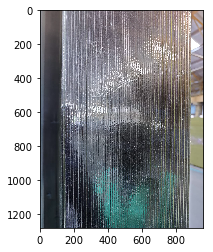

In [56]:
# reading the image
img = cv2.imread("task.jpg")
plt.imshow(img)

In [57]:
# I used Canny edge detection to detect edges and used that edges for the Hough transformation.
# And by getting lines from hough transformation, I drew the lines on the blank image so that lines can be clearly visible.

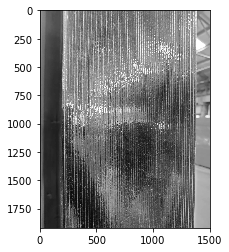

In [58]:
img1 = cv2.resize(img, (1500,1920)) # resizing the image for clarity
grey1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)     # converting to gray_scale
plt.imshow(grey1, cmap  = 'gray')

In [59]:
med = np.median(grey1)       
low = int(max(0, 0.7*med))
up = int(min(255,1.3*med))

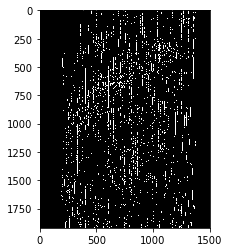

In [60]:
edges = cv2.Canny(grey1, 190,240)  # applying Canny detection to the gray_scale image
plt.imshow(edges, cmap  = 'gray')

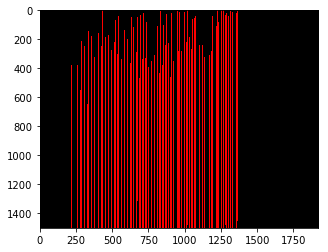

In [61]:
rho = 1
theta = 3*np.pi/180
threshold = 250
min_line_length = 20
max_line_gap = 1920

# Run Hough on the edge-detected image 
lines = cv2.HoughLinesP(edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)
blank_image2 = np.zeros(shape = [1500,1920,3], dtype = np.uint8)  # creating a blank_image to draw lines on 
# Iterate over the output "lines" and draw lines on the blank_image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(blank_image2, (x1,y1), (x2,y2), [255,0,0], 2)
        
plt.imshow(blank_image2, cmap = 'gray')  

In [62]:
print('Number of lines are',len(lines))

Number of lines are 233


In [63]:
# Since many lines are overlapping on each other, I used 2 units as thickness of sheet (or) the dustance between two lines.

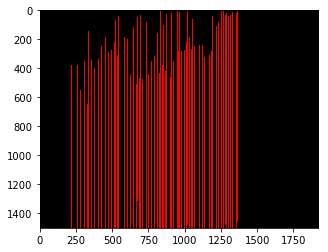

In [64]:
rho = 1
theta = 3*np.pi/180
threshold = 250
min_line_length = 20
max_line_gap = 1920

# Run Hough on the edge-detected image 
lines = cv2.HoughLinesP(edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)
blank_image2 = np.zeros(shape = [1500,1920,3], dtype = np.uint8)    # creating a blank_image to draw lines on 
lines = lines.reshape((-1,4))
lines = lines[lines[:,0].argsort()]   # sorting the lines
perfectLines = []
prevx1 = 0

# Iterate over the output "lines" and draw lines on the blank_image
for x1,y1,x2,y2 in lines:
    if x1 > (prevx1+2):      # assuming the thickness of sheet is 2 units
        cv2.line(blank_image2, (x1,y1), (x2,y2), [255,0,0], 2)
        prevx1 = x1
        perfectLines.append(x1)
plt.imshow(blank_image2, cmap = 'gray')   

In [65]:
print('Number of lines which are two units apart are',len(perfectLines))

Number of lines which are two units apart are 144
